In [4]:
## Importing librries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
## loading the data
data=pd.read_csv('ec2_disk_write_bytes_1ef3de.csv')

In [8]:
data

,timestamp,value
0,2014-03-01 17:34:00,0.0
1,2014-03-01 17:39:00,0.0
2,2014-03-01 17:44:00,0.0
3,2014-03-01 17:49:00,0.0
4,2014-03-01 17:54:00,0.0
...,...,...
4725,2014-03-18 03:19:00,0.0
4726,2014-03-18 03:24:00,0.0
4727,2014-03-18 03:29:00,0.0
4728,2014-03-18 03:34:00,0.0


# Basic checks

In [3]:
data.head()#first five rows

,timestamp,value
0,2014-03-01 17:34:00,0.0
1,2014-03-01 17:39:00,0.0
2,2014-03-01 17:44:00,0.0
3,2014-03-01 17:49:00,0.0
4,2014-03-01 17:54:00,0.0


In [4]:
data.tail()#last 5 rows

,timestamp,value
4725,2014-03-18 03:19:00,0.0
4726,2014-03-18 03:24:00,0.0
4727,2014-03-18 03:29:00,0.0
4728,2014-03-18 03:34:00,0.0
4729,2014-03-18 03:39:00,0.0


In [5]:
data.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4730 non-null   object 
 1   value      4730 non-null   float64
dtypes: float64(1), object(1)
memory usage: 74.0+ KB


In [6]:
data

,timestamp,value
0,2014-03-01 17:34:00,0.0
1,2014-03-01 17:39:00,0.0
2,2014-03-01 17:44:00,0.0
3,2014-03-01 17:49:00,0.0
4,2014-03-01 17:54:00,0.0
...,...,...
4725,2014-03-18 03:19:00,0.0
4726,2014-03-18 03:24:00,0.0
4727,2014-03-18 03:29:00,0.0
4728,2014-03-18 03:34:00,0.0


In [7]:
data=pd.read_csv('ec2_disk_write_bytes_1ef3de.csv',parse_dates=[0],index_col='timestamp')

In [8]:
data.head()#first five rows

,value
timestamp,
2014-03-01 17:34:00,0.0
2014-03-01 17:39:00,0.0
2014-03-01 17:44:00,0.0
2014-03-01 17:49:00,0.0
2014-03-01 17:54:00,0.0


In [9]:
data.rename(columns = {'#value': 'value'}, inplace = True)

In [10]:
data['value']

timestamp
2014-03-01 17:34:00    0.0
2014-03-01 17:39:00    0.0
2014-03-01 17:44:00    0.0
2014-03-01 17:49:00    0.0
2014-03-01 17:54:00    0.0
                      ... 
2014-03-18 03:19:00    0.0
2014-03-18 03:24:00    0.0
2014-03-18 03:29:00    0.0
2014-03-18 03:34:00    0.0
2014-03-18 03:39:00    0.0
Name: value, Length: 4730, dtype: float64

In [11]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc. 

,value
count,4.730000e+03
mean,6.581561e+06
std,4.038568e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,5.474570e+08


# EDA

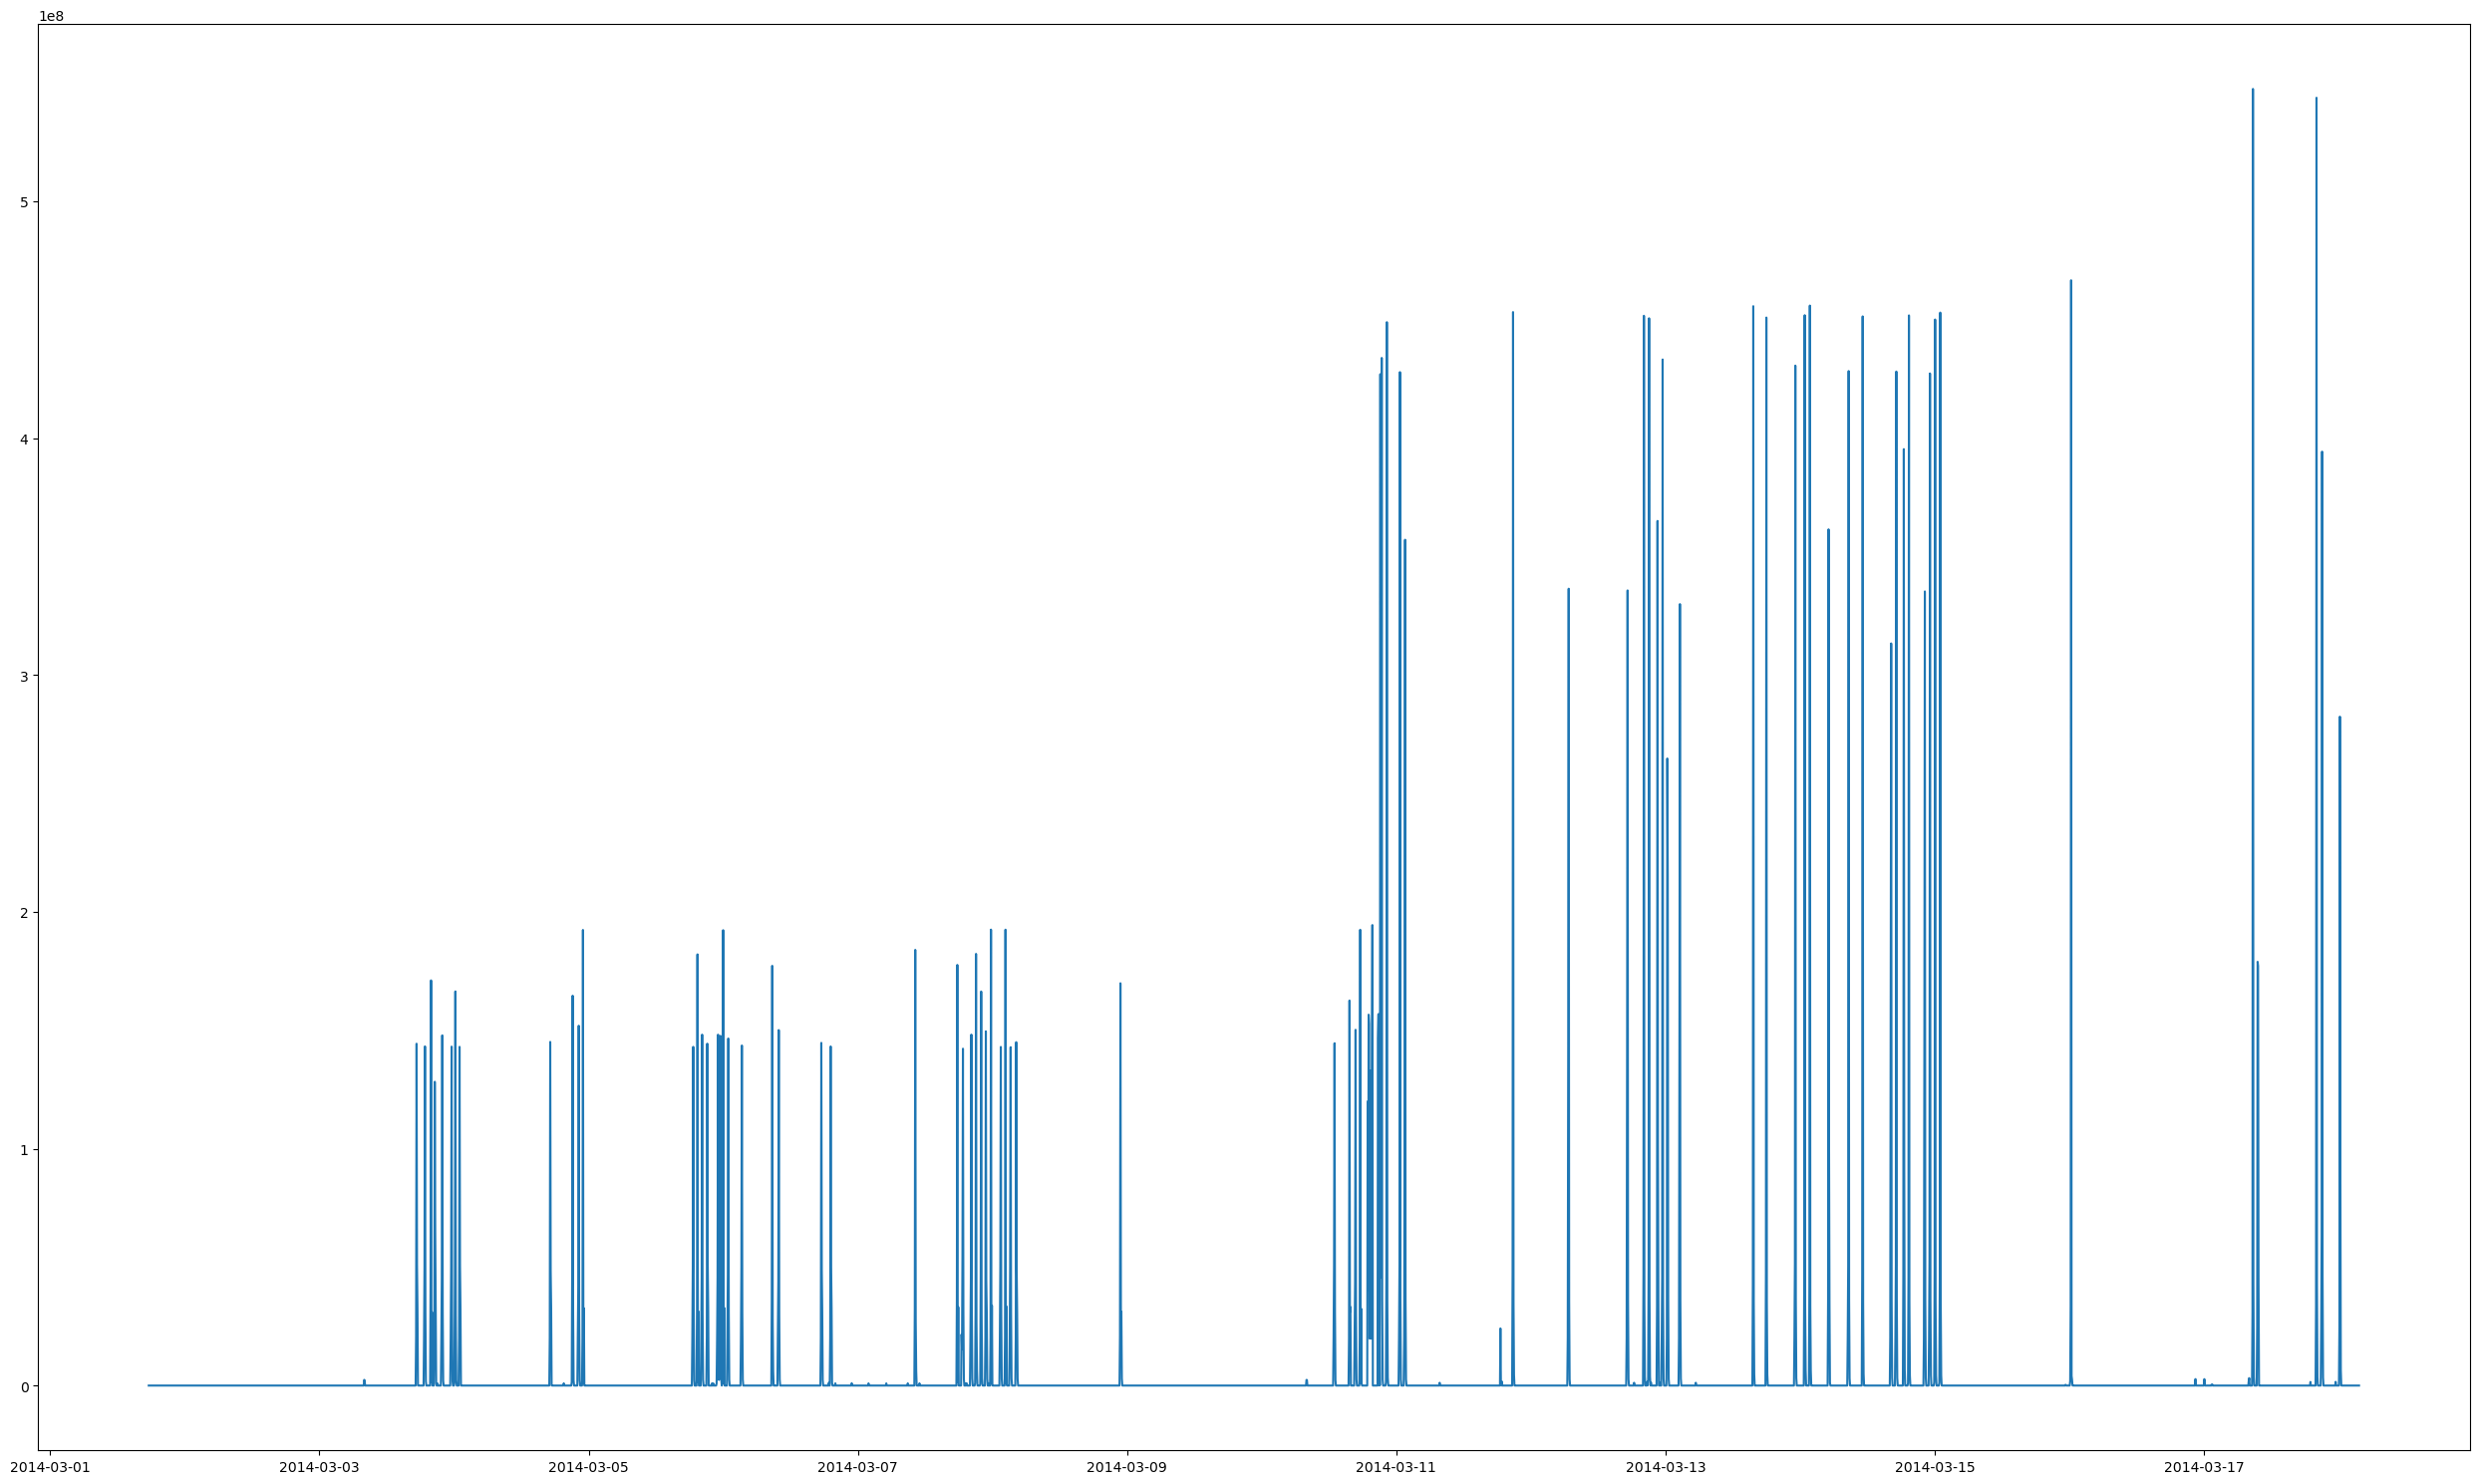

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()
## from plot we can see the series given is not stationary

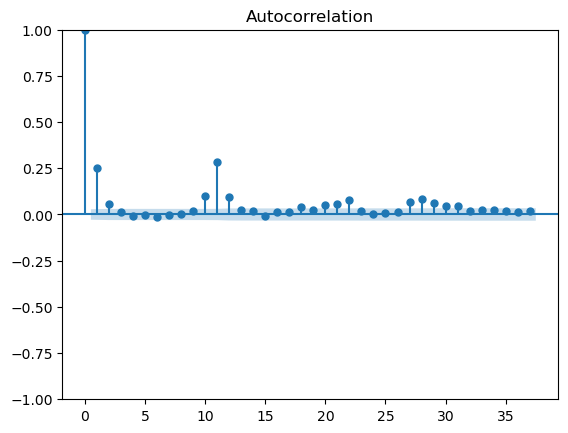

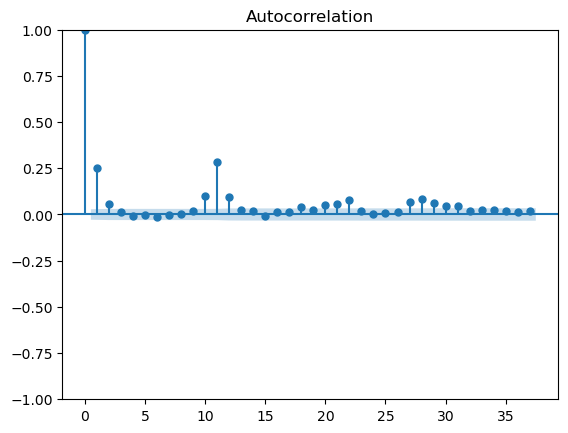

In [13]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [15]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():print("\t",key, ": ", val)

1. ADF :  -8.892912741858705
2. P-Value :  1.2286741976236198e-14
3. Num Of Lags :  27
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4702
5. Critical Values :
	 1% :  -3.4317415086267644
	 5% :  -2.86215488776668
	 10% :  -2.567097306976895


In [16]:
data


,value
timestamp,
2014-03-01 17:34:00,0.0
2014-03-01 17:39:00,0.0
2014-03-01 17:44:00,0.0
2014-03-01 17:49:00,0.0
2014-03-01 17:54:00,0.0
...,...
2014-03-18 03:19:00,0.0
2014-03-18 03:24:00,0.0
2014-03-18 03:29:00,0.0


In [17]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [18]:
data1 # Series integrated to the order of 1

,value
timestamp,
2014-03-01 17:34:00,NaN
2014-03-01 17:39:00,0.0
2014-03-01 17:44:00,0.0
2014-03-01 17:49:00,0.0
2014-03-01 17:54:00,0.0
...,...
2014-03-18 03:19:00,0.0
2014-03-18 03:24:00,0.0
2014-03-18 03:29:00,0.0


In [19]:
data1=data1.iloc[1:] #null value discarded
data1

,value
timestamp,
2014-03-01 17:39:00,0.0
2014-03-01 17:44:00,0.0
2014-03-01 17:49:00,0.0
2014-03-01 17:54:00,0.0
2014-03-01 17:59:00,0.0
...,...
2014-03-18 03:19:00,0.0
2014-03-18 03:24:00,0.0
2014-03-18 03:29:00,0.0


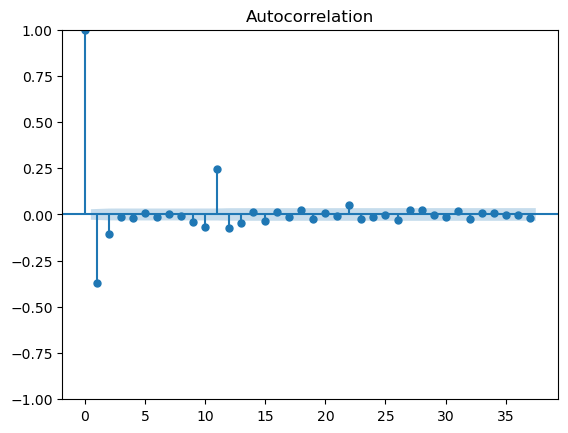

In [20]:
plot_acf(data1); # autocorrelation plot 

In [21]:
data2=data1.diff(periods=1) # differencing applied to data1

In [22]:
data2=data2.iloc[1:] # integrated to the order of 2

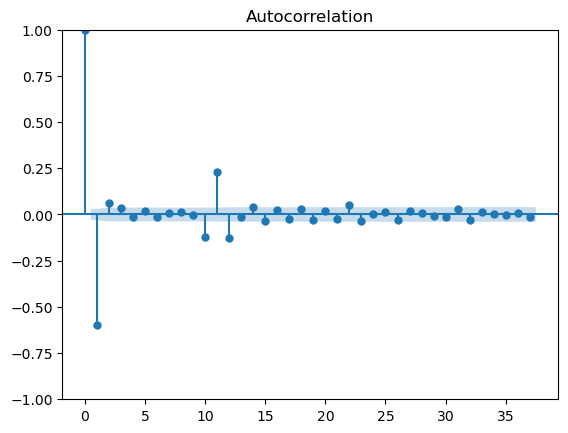

In [23]:
plot_acf(data2);

In [24]:
data2.shape#shape of the data rows and columns

(4728, 1)

In [25]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [26]:
test.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4628 entries, 2014-03-02 02:04:00 to 2014-03-18 03:39:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4628 non-null   float64
dtypes: float64(1)
memory usage: 72.3 KB


In [27]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [29]:
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [30]:
ar_model=AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

In [31]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)

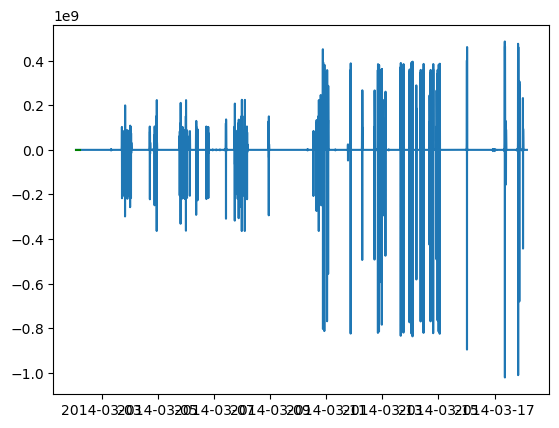

In [32]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [41]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [42]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [43]:
## evaluate the model
print(model_arima_fit.aic)

-2502.102558953023


In [44]:
## predicting the output of sample points
# predictions = model_arima_fit.forecast(steps=9)
prediction=model_arima_fit.predict(start=100,end=142)

In [45]:
prediction

2014-03-02 02:04:00    0.0
2014-03-02 02:09:00    0.0
2014-03-02 02:14:00    0.0
2014-03-02 02:19:00    0.0
2014-03-02 02:24:00    0.0
2014-03-02 02:29:00    0.0
2014-03-02 02:34:00    0.0
2014-03-02 02:39:00    0.0
2014-03-02 02:44:00    0.0
2014-03-02 02:49:00    0.0
2014-03-02 02:54:00    0.0
2014-03-02 02:59:00    0.0
2014-03-02 03:04:00    0.0
2014-03-02 03:09:00    0.0
2014-03-02 03:14:00    0.0
2014-03-02 03:19:00    0.0
2014-03-02 03:24:00    0.0
2014-03-02 03:29:00    0.0
2014-03-02 03:34:00    0.0
2014-03-02 03:39:00    0.0
2014-03-02 03:44:00    0.0
2014-03-02 03:49:00    0.0
2014-03-02 03:54:00    0.0
2014-03-02 03:59:00    0.0
2014-03-02 04:04:00    0.0
2014-03-02 04:09:00    0.0
2014-03-02 04:14:00    0.0
2014-03-02 04:19:00    0.0
2014-03-02 04:24:00    0.0
2014-03-02 04:29:00    0.0
2014-03-02 04:34:00    0.0
2014-03-02 04:39:00    0.0
2014-03-02 04:44:00    0.0
2014-03-02 04:49:00    0.0
2014-03-02 04:54:00    0.0
2014-03-02 04:59:00    0.0
2014-03-02 05:04:00    0.0
2

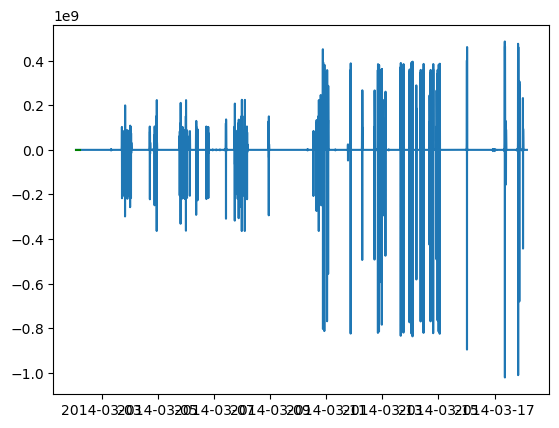

In [46]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [47]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [48]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)

(0, 0, 0) -2123.5918361436934
(0, 0, 1) -2121.5918361436943
(0, 0, 2) -2119.5918361436916
(0, 0, 3) -2117.591836143684
(0, 0, 4) -2115.591836143697
(0, 1, 0) -2504.103379672445
(0, 1, 1) -2502.1025589501846
(0, 1, 2) -2500.1025589501837
(0, 1, 3) -2498.1025589501846
(0, 1, 4) -2496.1025589501837
(0, 2, 0) -2462.5795023831606
(0, 2, 1) -2460.645958359674
(0, 2, 2) -2458.645958359674
(0, 2, 3) -2456.645958359674
(0, 2, 4) -2454.645958359674
(0, 3, 0) -1881.555219398772
(0, 3, 1) -1941.7534416855503
(0, 3, 2) -1737.093539212193
(0, 3, 3) -1950.981902168309
(0, 3, 4) -1932.4070015528907
(0, 4, 0) -1761.3877648940042
(0, 4, 1) -1745.6773611981362
(0, 4, 2) -1735.1886391945554
(0, 4, 3) -1743.4830499346094
(0, 4, 4) -1937.0742429697812
(1, 0, 0) -2121.5918361436893
(1, 0, 1) -2119.5918361436934
(1, 0, 2) -2117.591836143694
(1, 0, 3) -2115.591836143689
(1, 0, 4) -2113.591836143694
(1, 1, 0) -2502.102558953023
(1, 1, 1) -2500.10255985427
(1, 1, 2) -2498.102559854273
(1, 1, 3) -2496.10255985427

In [49]:
min(list2)  # lowest aic score

-2504.103379672445

In [50]:
loc=list2.index(min(list2))
loc

5

In [51]:
# pdq corresponding to lowest aic
list1[loc]

(0, 1, 0)

In [52]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [53]:
print(model_arima_fit.aic) # confirm aic score

-2109.5918361436943


In [54]:
forecast = model_arima_fit.forecast(steps=9)
forecast 

2014-03-02 02:04:00   -0.000005
2014-03-02 02:09:00   -0.000005
2014-03-02 02:14:00   -0.000005
2014-03-02 02:19:00   -0.000005
2014-03-02 02:24:00   -0.000005
2014-03-02 02:29:00   -0.000005
2014-03-02 02:34:00   -0.000005
2014-03-02 02:39:00   -0.000005
2014-03-02 02:44:00   -0.000005
Freq: 5T, Name: predicted_mean, dtype: float64

In [57]:
prediction=model_arima_fit.predict(start=50,end=142)

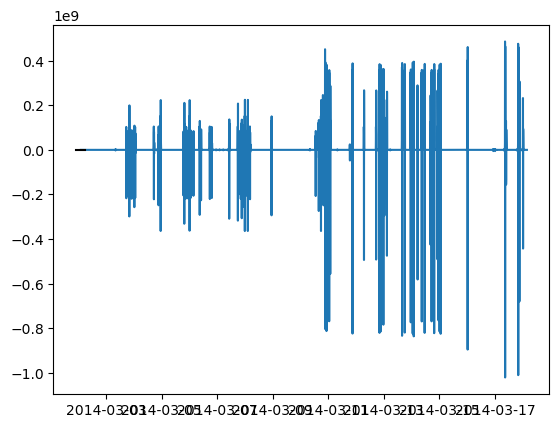

In [59]:
plt.plot(test)
plt.plot(prediction,color='black') 

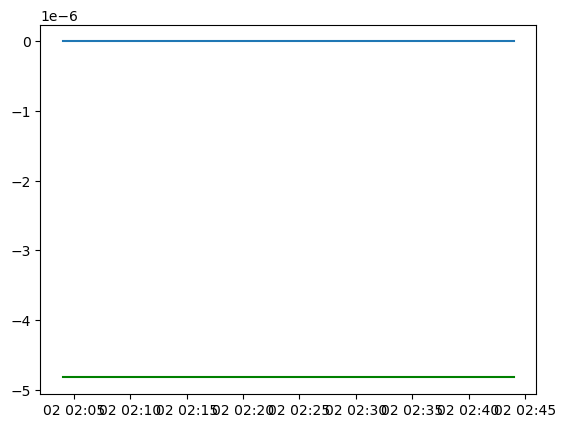

In [60]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [61]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

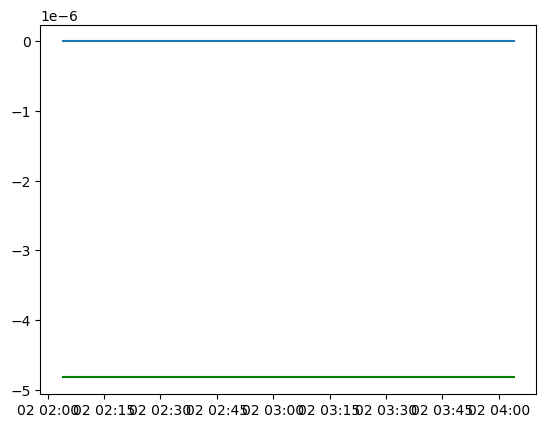

In [62]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [63]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 2.3276361496110884e-11,
 'mae': 4.8245581658957e-06,
 'rmse': 4.8245581658957e-06}

In [64]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)


4.8245581658957e-06


2.3276361496110884e-11

# Conclusion